## Project #7: Wine quality classification
<div> The <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"/>two datasets</a> are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.) like this.
Input variables (based on physicochemical tests): </div>
    <ul>1 - fixed acidity</ul>
    <ul>2 - volatile acidity</ul>
    <ul>3 - citric acid</ul>
    <ul>4 - residual sugar</ul>
    <ul>5 - chlorides</ul>
    <ul>6 - free sulfur dioxide</ul>
    <ul>7 - total sulfur dioxide</ul>
    <ul>8 - density</ul>
    <ul>9 - pH</ul>
    <ul>10 - sulphates</ul>
    <ul>11 - alcohol </ul>
     
Output variable (based on sensory data): <br>
    12 - quality (score between 0 and 10)

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 

Requirements:
1.	Classification type of wine with 4800 first of lines; 
2.	Use the last 98 of lines to test.


### Problem analysis:
- This is a supervised problem with known output data (wine quality in numeric 0 --> 10)
- This problem can be viewed as classification by bining the the output as 3 different categories (poor, normal, excellent) or regression in which the output is presented in numerical values.
- The requiremnt is to work on 4898 lines which is from red-wine dataset. So, the focus will be on red-wine dataset only
- We assess to apply regression method for this problem.

### Problem break down:
- Data preparation: load, display/plot statistic summary (mean, correlation, variance, ...) to understand the dataset. Based on that, number of preprocessing tasks may require for evaluated algorithm later on. 
- Algorithms spot check: select algorithms to evaluate, do cross validation for each, compare the result with Mean Square Error metric, apply some preprocessing techniques if needed to improve the result.
- Algorithm fine tuning: Perform the fine tunning method GridSearchCV to find best param for the training dataset
- Finalize the model, perform the test, update the result

In [28]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

### 1. Data preparation

In [29]:
#Load data
dataset = pd.read_csv('winequality-red.csv', delimiter=';')
#2.2 Descriptive observation (statistical view)
print(f"----------Shape----------\n{dataset.shape} \n---------Datatype---------\n{dataset.dtypes}")

----------Shape----------
(1599, 12) 
---------Datatype---------
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [30]:
# Look at raw data, the attributes are measured in different unit which may need to do scaling later on as the prefer input data for some algorithms
dataset.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9       0.08   
1            7.8              0.88         0.00             2.6       0.10   
2            7.8              0.76         0.04             2.3       0.09   
3           11.2              0.28         0.56             1.9       0.07   
4            7.4              0.70         0.00             1.9       0.08   
5            7.4              0.66         0.00             1.8       0.07   
6            7.9              0.60         0.06             1.6       0.07   
7            7.3              0.65         0.00             1.2       0.07   
8            7.8              0.58         0.02             2.0       0.07   
9            7.5              0.50         0.36             6.1       0.07   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0     1.00  3.51       0.56   
1                 25.0                  67.0     1.00  3.20       0.68   
2                 15.0                  54.0     1.00  3.26       0.65   
3                 17.0                  60.0     1.00  3.16       0.58   
4                 11.0                  34.0     1.00  3.51       0.56   
5                 13.0                  40.0     1.00  3.51       0.56   
6                 15.0                  59.0     1.00  3.30       0.46   
7                 15.0                  21.0     0.99  3.39       0.47   
8                  9.0                  18.0     1.00  3.36       0.57   
9                 17.0                 102.0     1.00  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [31]:
# Look at summarized descriptive data
pd.set_option('precision', 1)
display(dataset.describe())

fixed acidity  volatile acidity  citric acid  residual sugar  \
count         1599.0            1599.0      1.6e+03          1599.0   
mean             8.3               0.5      2.7e-01             2.5   
std              1.7               0.2      1.9e-01             1.4   
min              4.6               0.1      0.0e+00             0.9   
25%              7.1               0.4      9.0e-02             1.9   
50%              7.9               0.5      2.6e-01             2.2   
75%              9.2               0.6      4.2e-01             2.6   
max             15.9               1.6      1.0e+00            15.5   

       chlorides  free sulfur dioxide  total sulfur dioxide  density      pH  \
count    1.6e+03               1599.0                1599.0  1.6e+03  1599.0   
mean     8.7e-02                 15.9                  46.5  1.0e+00     3.3   
std      4.7e-02                 10.5                  32.9  1.9e-03     0.2   
min      1.2e-02                  1.0                   6.0  9.9e-01     2.7   
25%      7.0e-02                  7.0                  22.0  1.0e+00     3.2   
50%      7.9e-02                 14.0                  38.0  1.0e+00     3.3   
75%      9.0e-02                 21.0                  62.0  1.0e+00     3.4   
max      6.1e-01                 72.0                 289.0  1.0e+00     4.0   

       sulphates  alcohol  quality  
count     1599.0   1599.0   1599.0  
mean         0.7     10.4      5.6  
std          0.2      1.1      0.8  
min          0.3      8.4      3.0  
25%          0.6      9.5      5.0  
50%          0.6     10.2      6.0  
75%          0.7     11.1      6.0  
max          2.0     14.9      8.0

In [6]:
# Correlation look
# medium correlation 'fixed acidity' vs. citric acid(0.67), density (0.67), pH (-0.68)
# slightly medium correlation 'alcohol' vs. density (-0.5) & quality (0.48)

pd.set_option('precision', 2)
display(dataset.corr(method='pearson'))

fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00         -2.56e-01         0.67   
volatile acidity              -0.26          1.00e+00        -0.55   
citric acid                    0.67         -5.52e-01         1.00   
residual sugar                 0.11          1.92e-03         0.14   
chlorides                      0.09          6.13e-02         0.20   
free sulfur dioxide           -0.15         -1.05e-02        -0.06   
total sulfur dioxide          -0.11          7.65e-02         0.04   
density                        0.67          2.20e-02         0.36   
pH                            -0.68          2.35e-01        -0.54   
sulphates                      0.18         -2.61e-01         0.31   
alcohol                       -0.06         -2.02e-01         0.11   
quality                        0.12         -3.91e-01         0.23   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               1.15e-01   9.37e-02            -1.54e-01   
volatile acidity            1.92e-03   6.13e-02            -1.05e-02   
citric acid                 1.44e-01   2.04e-01            -6.10e-02   
residual sugar              1.00e+00   5.56e-02             1.87e-01   
chlorides                   5.56e-02   1.00e+00             5.56e-03   
free sulfur dioxide         1.87e-01   5.56e-03             1.00e+00   
total sulfur dioxide        2.03e-01   4.74e-02             6.68e-01   
density                     3.55e-01   2.01e-01            -2.19e-02   
pH                         -8.57e-02  -2.65e-01             7.04e-02   
sulphates                   5.53e-03   3.71e-01             5.17e-02   
alcohol                     4.21e-02  -2.21e-01            -6.94e-02   
quality                     1.37e-02  -1.29e-01            -5.07e-02   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
fixed acidity                        -0.11     0.67 -0.68   1.83e-01    -0.06   
volatile acidity                      0.08     0.02  0.23  -2.61e-01    -0.20   
citric acid                           0.04     0.36 -0.54   3.13e-01     0.11   
residual sugar                        0.20     0.36 -0.09   5.53e-03     0.04   
chlorides                             0.05     0.20 -0.27   3.71e-01    -0.22   
free sulfur dioxide                   0.67    -0.02  0.07   5.17e-02    -0.07   
total sulfur dioxide                  1.00     0.07 -0.07   4.29e-02    -0.21   
density                               0.07     1.00 -0.34   1.49e-01    -0.50   
pH                                   -0.07    -0.34  1.00  -1.97e-01     0.21   
sulphates                             0.04     0.15 -0.20   1.00e+00     0.09   
alcohol                              -0.21    -0.50  0.21   9.36e-02     1.00   
quality                              -0.19    -0.17 -0.06   2.51e-01     0.48   

                      quality  
fixed acidity            0.12  
volatile acidity        -0.39  
citric acid              0.23  
residual sugar           0.01  
chlorides               -0.13  
free sulfur dioxide     -0.05  
total sulfur dioxide    -0.19  
density                 -0.17  
pH                      -0.06  
sulphates                0.25  
alcohol                  0.48  
quality                  1.00

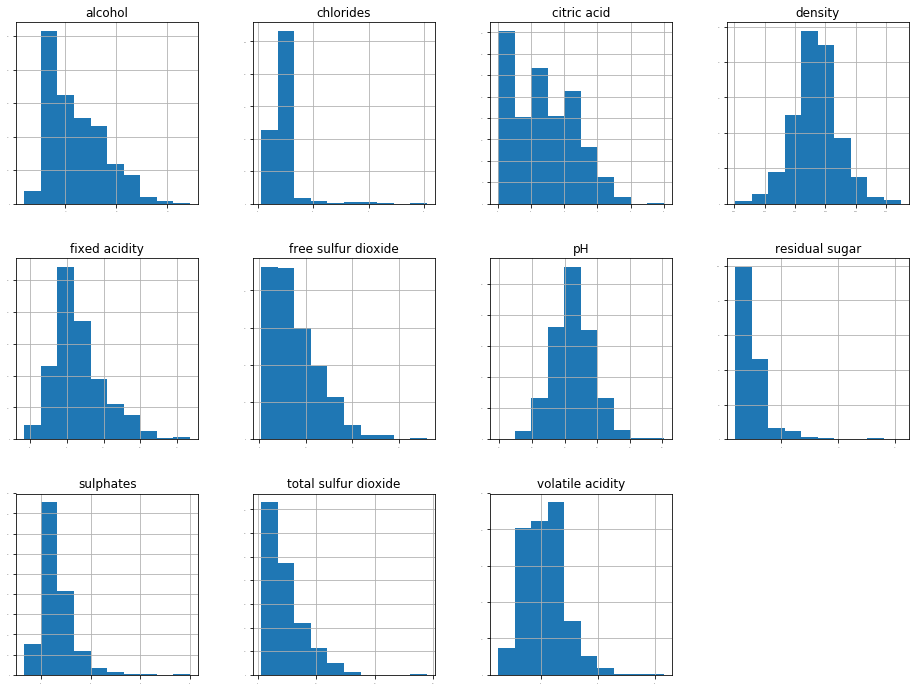

In [32]:
#Visualize data with histogram plot
dataset.drop(columns='quality').hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,4), figsize=(16, 12))
plt.show()

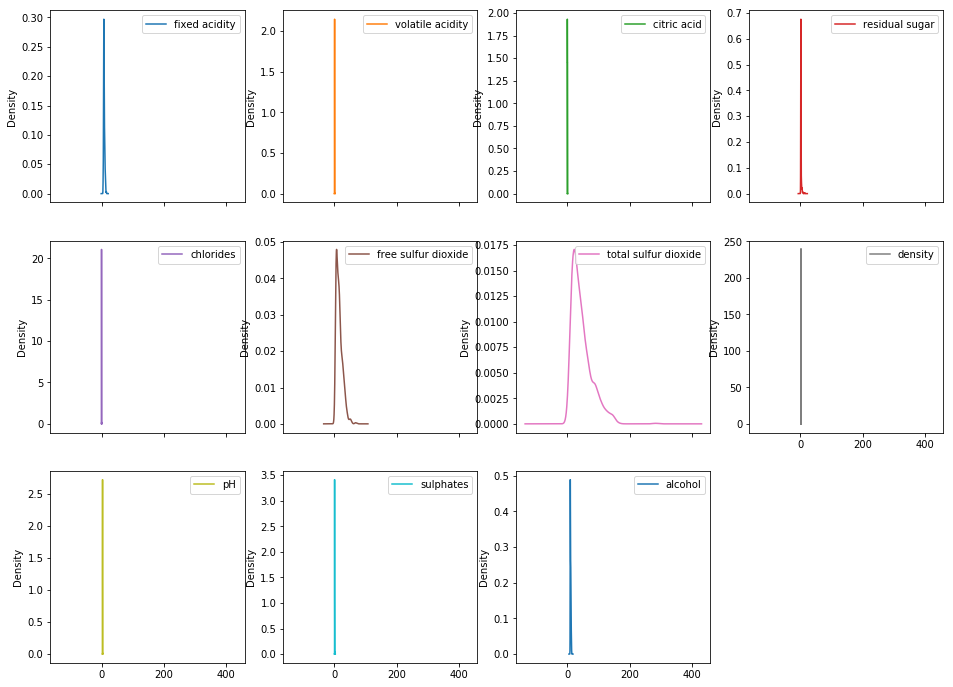

In [33]:
# Density chart can give the better view compared to histogram to define which one is in normal distribution, or which one is skew
dataset.drop(columns='quality').plot(kind='density', subplots=True, layout=(3,4), figsize=(16,12))
plt.show()

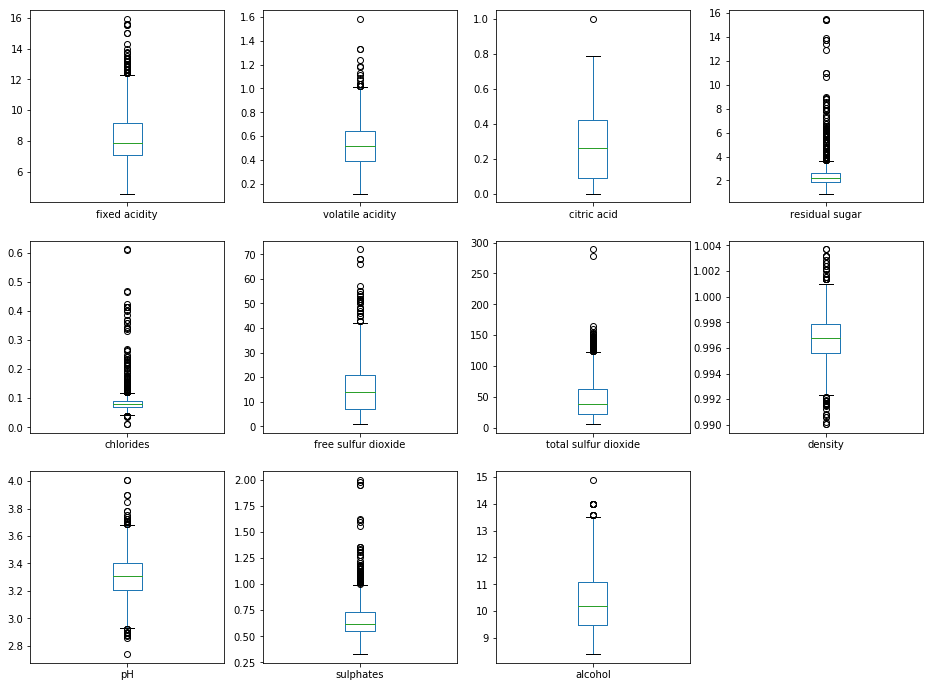

In [34]:
#Box plot view to see if any outliers detected as well as the range distribution by quantiles
dataset.drop(columns='quality').plot(kind='box', subplots=True, layout=(3,4), figsize=(16,12))
plt.show()

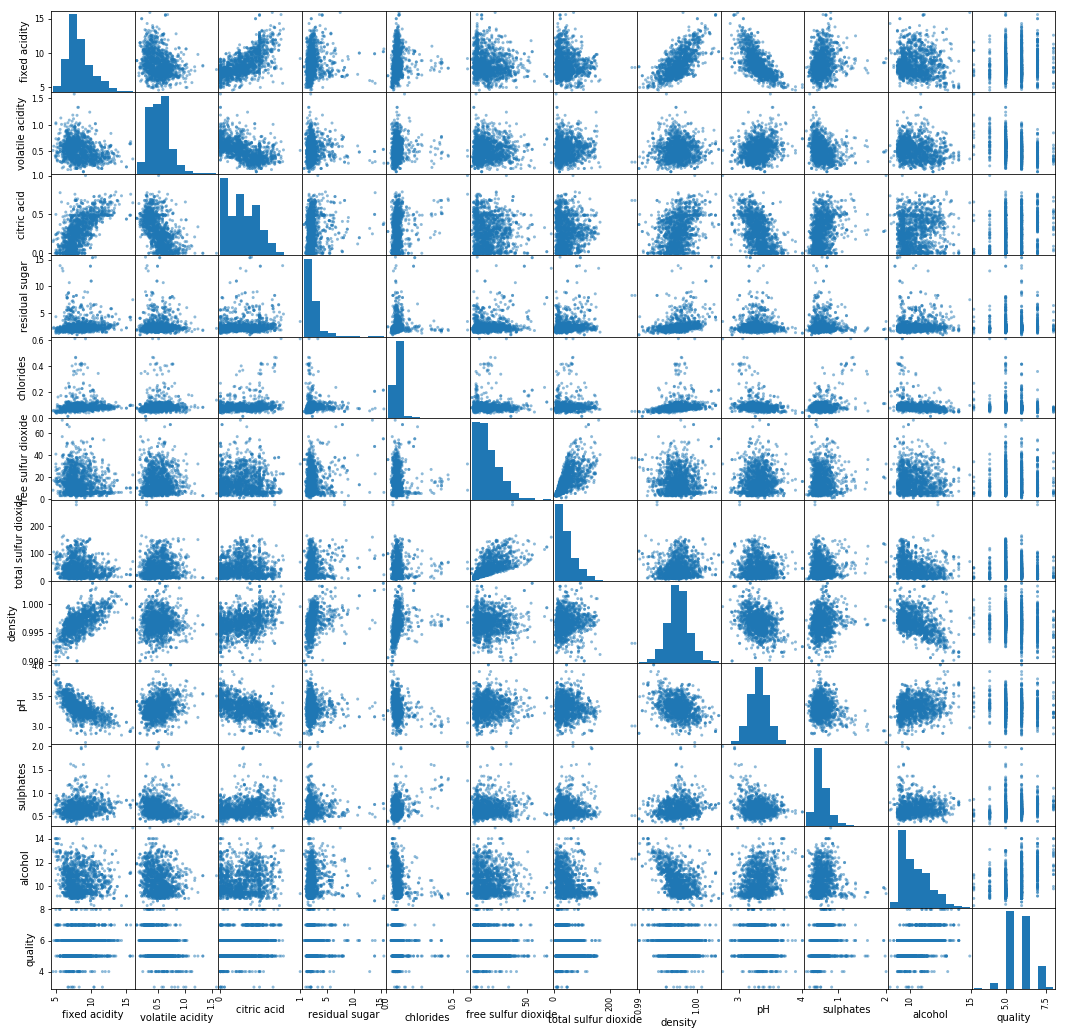

In [10]:
#Scatter plot view to see the correlation between attributes
pd.plotting.scatter_matrix(dataset, figsize=(18,18))
plt.show()

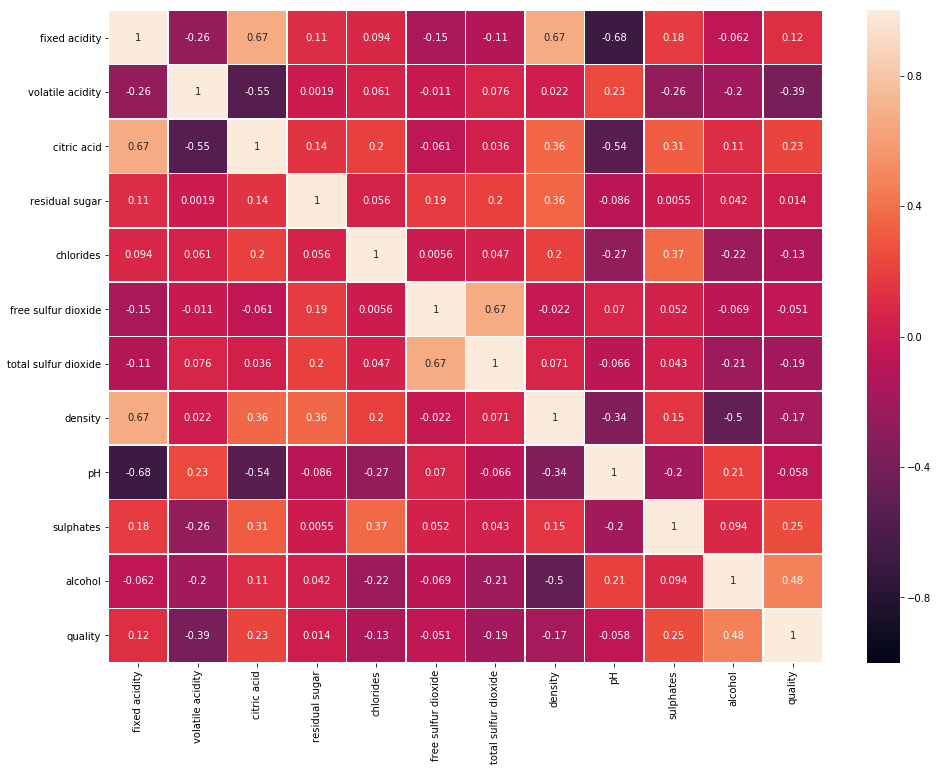

In [35]:
#Visualize the relationship between attributes using heat map. This grapth better to provide the correlation in number. Normally, the result >0.7 or <-0.7 is telling the strong relationship.
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(dataset.corr(), vmax=1, vmin=-1, annot=True, ax=ax, linewidths=0.5)

### 2. Algorithm spot check 

In [36]:
# Prepare the traing, test dataset
array = dataset.values
X = array[:, :11]
Y = array[:, 11]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [39]:
# Test option and evaluate the metric, we are using mean square error method to evaluate the algorithm prediction performance (the closer to zero, the better)
# https://en.wikipedia.org/wiki/Mean_squared_error
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [14]:
# Spot check the algorithm with default setting by sklearn
# The result will be the mean and standard deviation of MSE (Mean Square Error) for each algorithm
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))

In [15]:
# Evaluate the results in turn
# Seeing that LR is perform well, following by SVR & KNN
results = []
names = []
print("\t MSE Mean \t\t MSE std")
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print(f"{name}\t: {cv_result.mean()} \t{cv_result.std()}")

	 MSE Mean 		 MSE std
LR	: -0.4387495039356786 	0.04690693514476684
LASSO	: -0.6535380776977565 	0.04293183865704886
EN	: -0.653406075763606 	0.04536377982306341
CART	: -0.6810469980314962 	0.07209575571440756
KNN	: -0.5927411417322835 	0.03293392650488583
SVR	: -0.5089862264153407 	0.053988794529971726


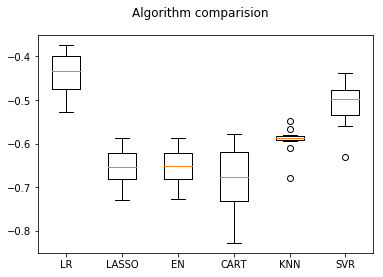

In [16]:
# Compare algorithm with box plot representation
fig = plt.figure()
fig.suptitle('Algorithm comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Perform the preprocessing by scaling input data to see if any improvement for our algorithms examination
http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [17]:
#Standadize the dataset
#Haha, now the winner is SVR (Support Vector Machine Regression) with RobustScaler method applied
def preprocess_method_comparison(X_train, Y_train, scale_method):
    pipelines = []
    if scale_method=='standard':
        pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))
    elif scale_method=='min_max':
        pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()), ('LR', LinearRegression())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler()), ('SVR', SVR())])))
    elif scale_method=='robust':
        pipelines.append(('ScaledLR', Pipeline([('Scaler', RobustScaler()), ('LR', LinearRegression())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', RobustScaler()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', RobustScaler()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', RobustScaler()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', RobustScaler()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', RobustScaler()), ('SVR', SVR())])))
    elif scale_method=='normalizer':
        pipelines.append(('ScaledLR', Pipeline([('Scaler', Normalizer()), ('LR', LinearRegression())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', Normalizer()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', Normalizer()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', Normalizer()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', Normalizer()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', Normalizer()), ('SVR', SVR())])))
    
    # Score printing
    results = []
    names = []
    print("\t MSE Mean \t\t MSE std")
    for name, model in pipelines:
        kfold = KFold(n_splits=num_folds, random_state=seed)
        cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_result)
        names.append(name)
        print(f"{name}\t: {cv_result.mean()} \t{cv_result.std()}")
    
    #Plotting
    fig = plt.figure()
    fig.suptitle('Algorithm comparision')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

	 MSE Mean 		 MSE std
ScaledLR	: -0.43874950393568135 	0.04690693514477376
ScaledLASSO	: -0.6693396159755951 	0.038885706578409604
ScaledEN	: -0.6693396159755951 	0.038885706578409604
ScaledCART	: -0.723228346456693 	0.10451580190613406
ScaledKNN	: -0.4795935039370079 	0.05058796012649637
ScaledSVM	: -0.41262755226098236 	0.05221964671450334


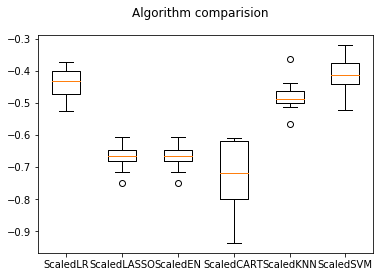

In [18]:
preprocess_method_comparison(X_train, Y_train, 'standard')

	 MSE Mean 		 MSE std
ScaledLR	: -0.43874950393568135 	0.046906935144773676
ScaledLASSO	: -0.6693396159755951 	0.038885706578409604
ScaledEN	: -0.6693396159755951 	0.038885706578409604
ScaledCART	: -0.7106975885826772 	0.06343601918811423
ScaledKNN	: -0.48164517716535427 	0.054037979204836405
ScaledSVM	: -0.44428895084061215 	0.045331556692727336


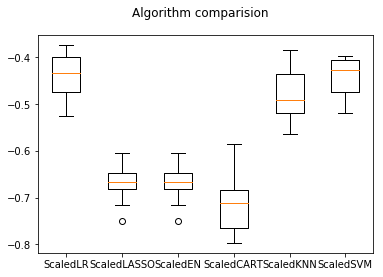

In [21]:
preprocess_method_comparison(X_train, Y_train, 'min_max')

	 MSE Mean 		 MSE std
ScaledLR	: -0.43874950393568135 	0.04690693514477375
ScaledLASSO	: -0.6693396159755951 	0.038885706578409604
ScaledEN	: -0.6693396159755951 	0.038885706578409604
ScaledCART	: -0.7474655511811024 	0.0941890428601406
ScaledKNN	: -0.47355880905511805 	0.07426301720393323
ScaledSVM	: -0.4099181275687912 	0.059612340248704064


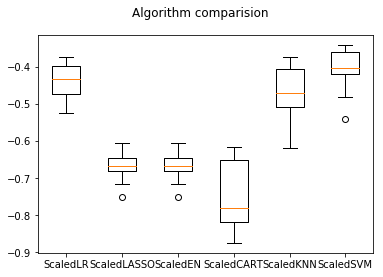

In [20]:
preprocess_method_comparison(X_train, Y_train, 'robust')

	 MSE Mean 		 MSE std
ScaledLR	: -0.4410455388976079 	0.0257542432416267
ScaledLASSO	: -0.6693396159755951 	0.038885706578409604
ScaledEN	: -0.6693396159755951 	0.038885706578409604
ScaledCART	: -0.7739911417322834 	0.12026419676136856
ScaledKNN	: -0.6222974901574804 	0.05883984766783229
ScaledSVM	: -0.6420735382206374 	0.06468165183941926


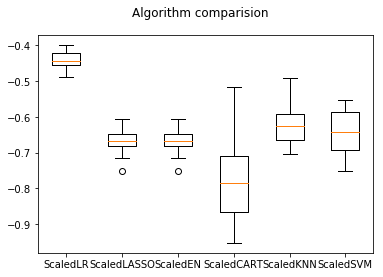

In [19]:
preprocess_method_comparison(X_train, Y_train, 'normalizer')

### 3. Algorithm fine tuning

In [23]:
# Tune scaled SVM
# Not improve much from -0.4099181275687912 to -0.40653999420403353
# http://scikit-learn.org/stable/modules/grid_search.html
scaler = RobustScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C = c_values, kernel = kernel_values)
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv = kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [27]:
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, std, param in zip(means, stds, params):
#    print(f"{mean} ({std}) with: {param}")

Best score: -0.40653999420403353 using {'C': 2.0, 'kernel': 'rbf'}
